In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [3]:
x = sym.Symbol('x',real=True)

In [4]:
def GetLaguerre (n,x):
    
    if n == 0:
        poli = sym.Number(1)
    elif n ==1:
        poli = (1-x)
    else:
        poli = ((2*n-1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
        
    return sym.expand(poli,x)

In [5]:
GetLaguerre(3,x)

-x**3/6 + 3*x**2/2 - 3*x + 1

In [6]:
def derivadasLaguerre(n,x):
    
    derivadas = GetLaguerre(n,x)
    
    return sym.diff(derivadas,x,1)

In [7]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [8]:
def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [9]:
def GetAllRootsGLag(n):
    
    vn = np.linspace(0,n+(n-1)*np.sqrt(n),100)
    
    Laguerre = []
    D_Laguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,x))
        D_Laguerre.append(derivadasLaguerre(i,x))
    
    poli = sym.lambdify([x],Laguerre[n],'numpy')
    D_poli = sym.lambdify([x],D_Laguerre[n],'numpy')
    Roots = GetRoots(poli,D_poli,vn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [10]:
raices = GetAllRootsGLag(3)

In [11]:
def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)

    Laguerre = []
    
    for i in range(n+2):
        Laguerre.append(GetLaguerre(i,x))
    
    poli = sym.lambdify([x],Laguerre[n+1],'numpy')
    Weights = Roots/(((n+1)**2)*(poli(Roots)**2))
    
    return Weights

In [12]:
pesos = GetWeightsGLag(3)

In [13]:
f = lambda x: (x**3)/(np.exp(x)-1)*np.exp(x)

In [14]:
I = np.sum(pesos*f(raices))

In [20]:
I

6.481130171427755

In [17]:
"Parte b"

'Parte b'

In [18]:
def cuadratura_laguerre(f,n):
    
    raices_t,pesos_t = np.polynomial.laguerre.laggauss(n)
    
    I = 0
    for i in range(n):
        I += pesos_t[i]*f(raices_t[i])
    
    return I

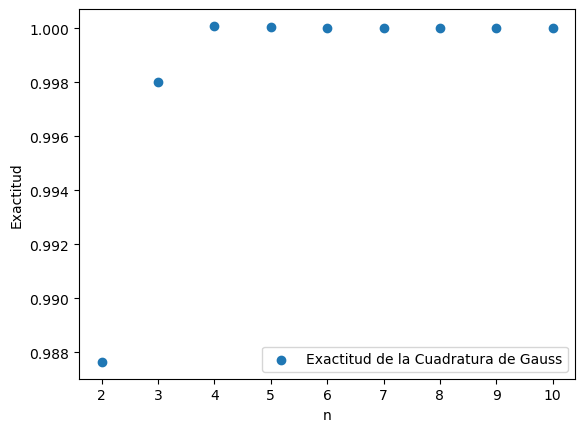

In [19]:
teorico = (np.pi**4)/15

N = [2,3,4,5,6,7,8,9,10]

exactitud = []

i = 2

while i <= 10:

        error_p = cuadratura_laguerre(f,i)/teorico
        
        exactitud.append(error_p)
        
        i +=1
        
plt.figure()

plt.scatter(N,exactitud,label ="Exactitud de la Cuadratura de Gauss")

plt.legend()
plt.xlabel('n')
plt.ylabel('Exactitud')
plt.show() 